c:\Users\PALMPAY\anaconda3\envs\findocgpt-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading FinanceBench dataset...


c:\Users\PALMPAY\anaconda3\envs\findocgpt-env\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\PALMPAY\.cache\huggingface\hub\datasets--PatronusAI--financebench. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating train split: 100%|██████████| 150/150 [00:00<00:00, 3498.77 examples/s]
C:\Users\PAL

Dataset shape: (150, 15)
Columns: ['financebench_id', 'company', 'doc_name', 'question_type', 'question_reasoning', 'domain_question_num', 'question', 'answer', 'justification', 'dataset_subset_label', 'evidence', 'gics_sector', 'doc_type', 'doc_period', 'doc_link']

First 5 rows:
         financebench_id company     doc_name      question_type  \
0  financebench_id_03029      3M  3M_2018_10K  metrics-generated   
1  financebench_id_04672      3M  3M_2018_10K  metrics-generated   
2  financebench_id_00499      3M  3M_2022_10K    domain-relevant   
3  financebench_id_01226      3M  3M_2022_10K    domain-relevant   
4  financebench_id_01865      3M  3M_2022_10K    novel-generated   

                                  question_reasoning domain_question_num  \
0                             Information extraction                None   
1                             Information extraction                None   
2   Logical reasoning (based on numerical reasoning)                dg06   
3  Lo

[*********************100%***********************]  1 of 1 completed
C:\Users\PALMPAY\AppData\Local\Temp\ipykernel_19172\1780582917.py:41: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, period='1y')


Downloaded 250 days of data for AAPL


[*********************100%***********************]  1 of 1 completed
C:\Users\PALMPAY\AppData\Local\Temp\ipykernel_19172\1780582917.py:41: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, period='1y')


Downloaded 250 days of data for MSFT


[*********************100%***********************]  1 of 1 completed
C:\Users\PALMPAY\AppData\Local\Temp\ipykernel_19172\1780582917.py:41: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, period='1y')


Downloaded 250 days of data for GOOGL


[*********************100%***********************]  1 of 1 completed
C:\Users\PALMPAY\AppData\Local\Temp\ipykernel_19172\1780582917.py:41: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, period='1y')


Downloaded 250 days of data for AMZN


[*********************100%***********************]  1 of 1 completed


Downloaded 250 days of data for TSLA

Generating price trend visualization...
Plot saved as "stock_price_trends.png"


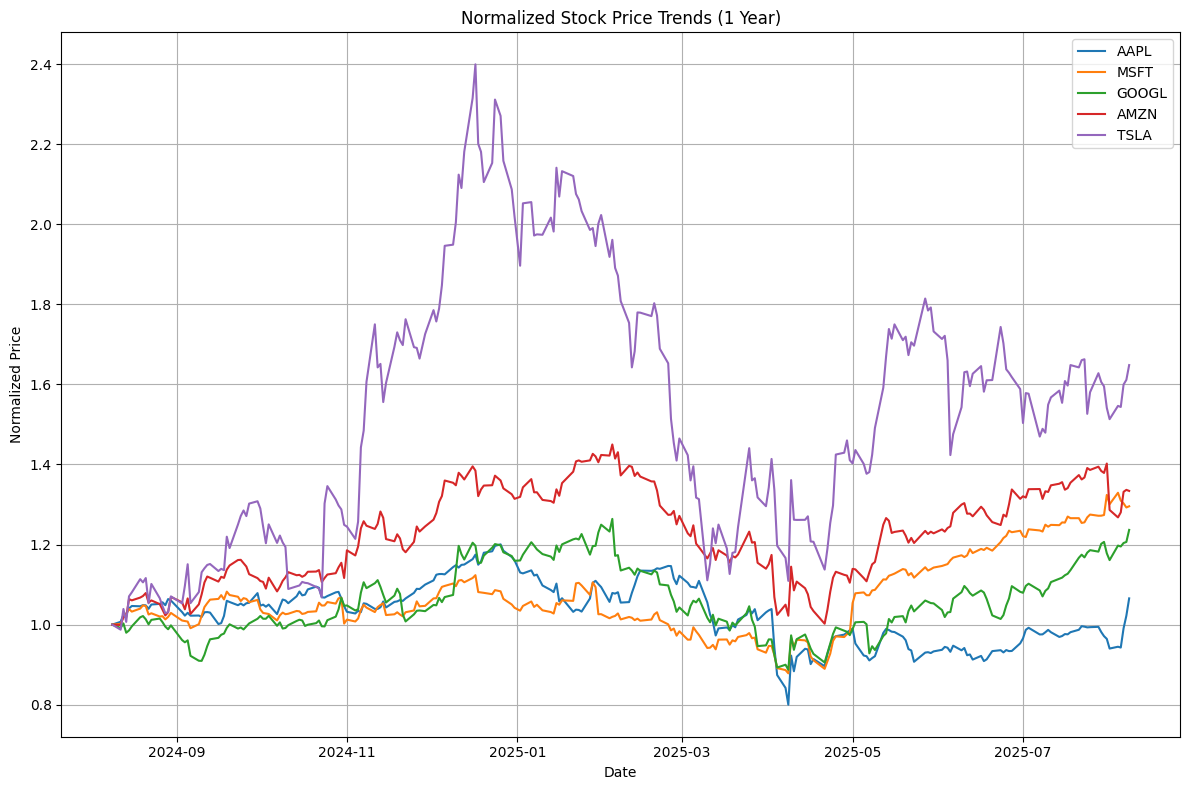


Exploration completed!
Dataset stored in 'dataset_df' with 150 rows
Market data available for 5 symbols


In [2]:
#!/usr/bin/env python3
"""
FinDocGPT Data Exploration
This script explores the FinanceBench dataset and market data
Converted from: notebooks/01_data_exploration.ipynb
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datasets import load_dataset

def main():
    """Main function to run the data exploration."""
    
    # Load FinanceBench dataset
    print('Loading FinanceBench dataset...')
    dataset = load_dataset('PatronusAI/financebench')
    df = dataset['train'].to_pandas()
    
    print(f'Dataset shape: {df.shape}')
    print(f'Columns: {df.columns.tolist()}')
    print('\nFirst 5 rows:')
    print(df.head())
    
    # Explore question types
    print('\nAnalyzing question characteristics...')
    print('Question length distribution:')
    df['question_length'] = df['question'].str.len()
    print(df['question_length'].describe())
    
    # Load sample market data
    print('\nLoading market data...')
    symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
    market_data = {}
    
    for symbol in symbols:
        try:
            data = yf.download(symbol, period='1y')
            market_data[symbol] = data
            print(f'Downloaded {len(data)} days of data for {symbol}')
        except Exception as e:
            print(f'Error downloading {symbol}: {e}')
    
    # Plot price trends
    if market_data:
        print('\nGenerating price trend visualization...')
        plt.figure(figsize=(12, 8))
        
        for symbol, data in market_data.items():
            if not data.empty:
                normalized_prices = data['Close'] / data['Close'].iloc[0]
                plt.plot(normalized_prices.index, normalized_prices, label=symbol)
        
        plt.title('Normalized Stock Price Trends (1 Year)')
        plt.xlabel('Date')
        plt.ylabel('Normalized Price')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        
        # Save the plot
        plt.savefig('stock_price_trends.png', dpi=300, bbox_inches='tight')
        print('Plot saved as "stock_price_trends.png"')
        
        # Show the plot
        plt.show()
    else:
        print('No market data available for plotting.')
    
    return df, market_data

if __name__ == "__main__":
    # Run the exploration
    dataset_df, market_data_dict = main()
    
    print("\nExploration completed!")
    print(f"Dataset stored in 'dataset_df' with {len(dataset_df)} rows")
    print(f"Market data available for {len(market_data_dict)} symbols")